In [1]:
#!pip install scipy
#!pip install -U scikit-learn

import os
import scipy.io.wavfile as wav
from scipy.fft import rfft, irfft, rfftfreq
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

folder_dev = r"free-spoken-digit\dev"
files = os.listdir(folder_dev)
files.sort()
freq = 8000 # Sampled at 8kHz


0_4.wav
8000


C:\Users\User\jupytervenv\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


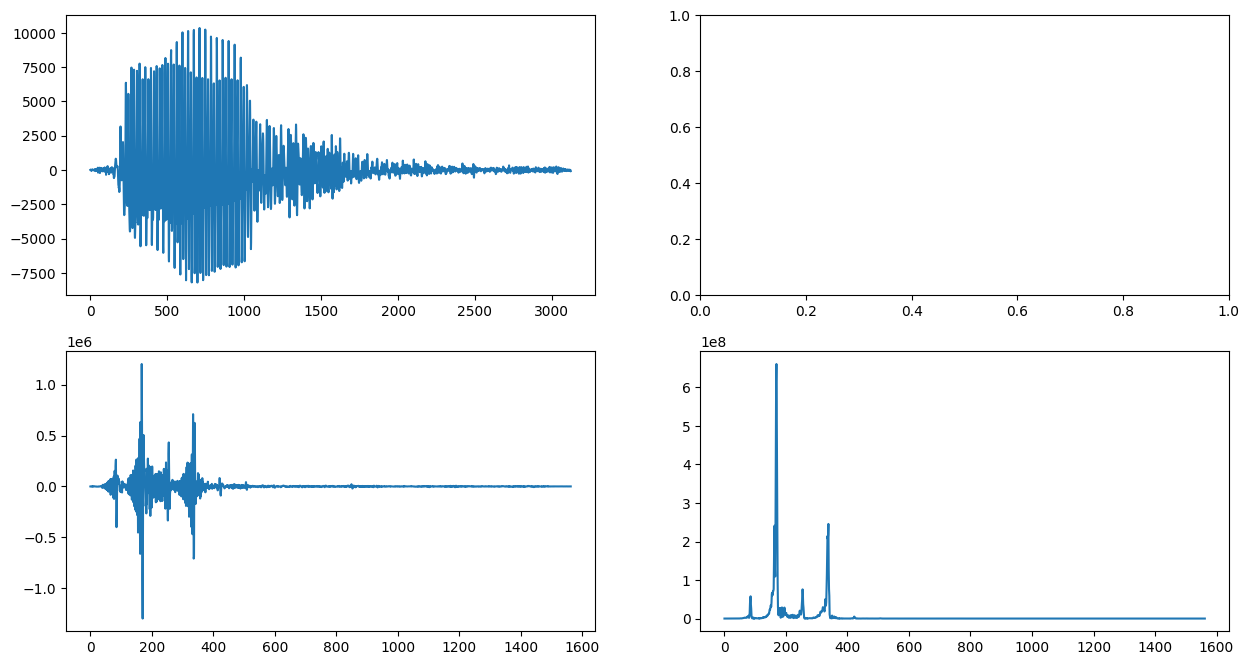

In [22]:
n = 0
filewav = wav.read(folder_dev+"\\"+files[n])
print(files[n])
print(filewav[0])
fig, ax = plt.subplots(2,2,figsize=(15, 8))
ax[0][0].plot(filewav[1])

wav_fft = rfft(filewav[1])
ax[1][0].plot(wav_fft)

#wav_fft[len(wav_fft)//2:] = 0
pp = wav_fft * np.conjugate(wav_fft) / filewav[1].size

ax[1][1].plot(pp)

#new_wav = fft.ifft(pp)
#ax[0][1].plot(new_wav.real)


plt.show()


In [3]:
# Get the data (either read it or, if file not found, create the file)
try:
    df_read = pd.read_csv("csv_wav.csv")
    df_read.index = df_read["0"]
    df = df_read.drop("0", axis=1)
except:
    print("File not found!")
    df = pd.DataFrame()
    for i in range(len(files)):
        index = int(files[i].split("_")[0])
        numba = int(files[i].split("_")[1].split(".")[0])
        filewav = wav.read(folder_dev+"\\"+files[i])[1]
        data = np.insert(filewav, 0, numba)
        data = np.insert(data, 0 , index)
        data_series = pd.Series(data).to_frame().T.set_index(0)
        df = pd.concat([df,data_series])
    df.to_csv("csv_wav.csv")


In [32]:
X = df.drop("1", axis=1)
y = df.loc[:,"1"]


3125


(2560,)

In [42]:
import librosa

X_np = X.to_numpy()
X_trimmed = np.empty(X_np.shape)
X_trimmed.shape
for i,audio in enumerate(X_np):
    audio_nn = audio[~(np.isnan(audio))]
    audio_trimmed, _ = librosa.effects.trim(audio_nn, top_db=10)
    
    fill_array = np.empty((X_trimmed.shape[1]-audio_trimmed.shape[0], ))
    fill_array[:] = np.NaN
    break
# b = a[]
# a_trimmed, _ = librosa.effects.trim(a, top_db=10)
# a_trimmed.shape

(15007,)
(2560,)


In [23]:
df

,1,2,3,4,5,6,7,8,9,10,...,17559,17560,17561,17562,17563,17564,17565,17566,17567,17568
0,,,,,,,,,,,,,,,,,,,,,
0,4,14,21,0,18,-11,22,-15,-53,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000,0,10,1,13,3,12,7,10,8,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,1,0,0,-256,0,-256,0,0,-256,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,6,-169,1,-144,19,-140,70,-118,92,-85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003,2,309,-385,435,-183,-34,188,-1,-23,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,2,0,-256,0,-256,0,-256,0,-256,-256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,3,-768,0,-256,256,-256,768,0,512,-256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999,6,-256,-256,0,-256,-256,0,0,-512,-256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
from fftPreprocessor import FourierPreprocessor
from sklearn.preprocessing import MinMaxScaler

# minmax = MinMaxScaler((-1,1))
# X_prep = minmax.fit_transform(X)

prep = FourierPreprocessor(1500, sample_rate=8000)
X_prep = prep.fit_transform(X)

# minmax_fft = MinMaxScaler()
# X_prep = minmax_fft.fit_transform(X_prep)

KeyError: 0

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_prep, y, train_size=0.70)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 15)
clf.fit(X_train, y_train)
# from sklearn.tree import DecisionTreeClassifier
# regressor = DecisionTreeClassifier() 
# regressor.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred, average="macro"))
print(metrics.confusion_matrix(y_test, y_pred))

#RRT & BAYESIAN TREE